## Credit Card Fraud Detection

### Goal:
Try to detect whether credit card transaction is fraudalent or not based on certain predictors.


### Attribute Information:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent. (1 represents a fraudulent transaction)

In [1]:
# import essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the data
card_url = "https://drive.google.com/file/d/1XdIqSj2n4fZ_B2lLyWNtBisDLDScxSd8/view?usp=drive_link"
card_path = "https://drive.google.com/uc?id=" + card_url.split("/")[-2]
card = pd.read_csv(card_path)

# create a copy of data frame to keep original
real_card = card.copy()
card.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
# data dimensions
card.shape

(1000000, 8)

This data frame consists of 1000000 observations and 8 columns.

In [4]:
# column names
card.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [5]:
# column information
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
card.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
# check for missing values
card.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

We have no missing values.

## Visualizations

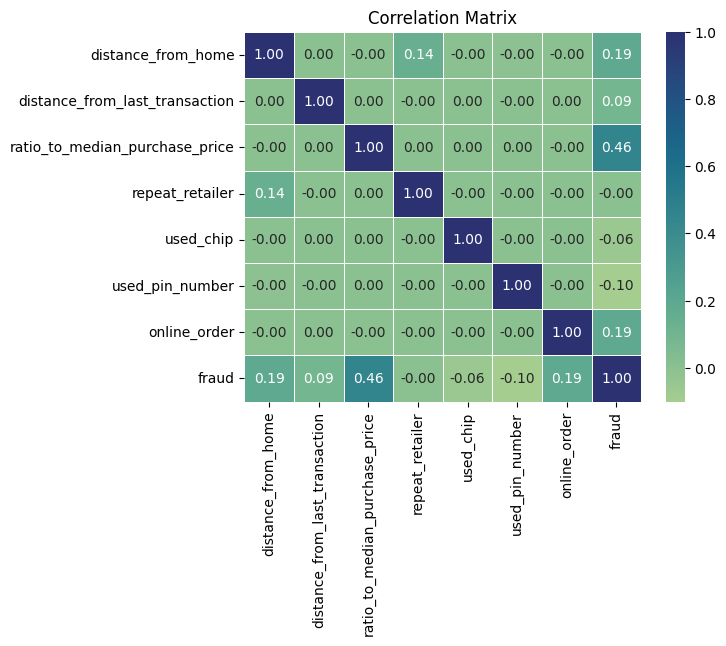

In [8]:
# check for correlation between variables
cor = card.corr()
sns.heatmap(cor, annot = True, fmt = '.2f', cmap = 'crest', linewidth = 0.7)
plt.title("Correlation Matrix")
plt.show()

Looking at the correlation heatap above, we can see we have a strong correlation between our target variable fraud and the ratio to median purchase median price feature. Therefore, we must have ratio to median purchase price as a predictor for our models. 

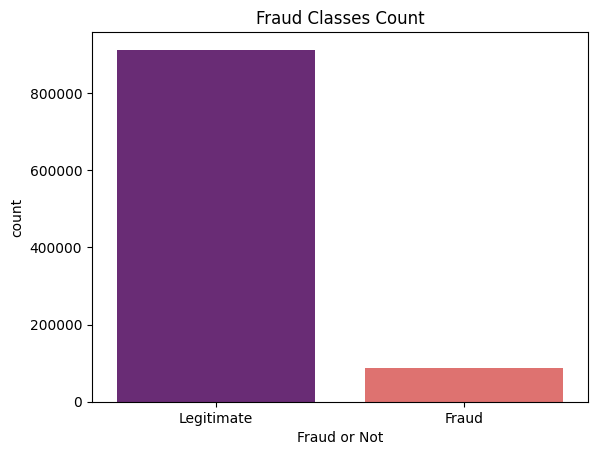

In [9]:
# check the distribution of class on our target variable
card['fraud'].value_counts()
sns.countplot(x = 'fraud', data = card, palette = 'magma')
plt.title("Fraud Classes Count")
plt.xticks(ticks = [0,1], labels = ['Legitimate','Fraud'])
plt.xlabel('Fraud or Not')
plt.show()

We can clearly see the distribution between the number of fraudlent purchases and non-fraudlent purchase where there is a significant amount of non-fraudulent purchases in our data.

online_order     0.0     1.0
fraud                       
0.0           344756  567841
1.0             4692   82711


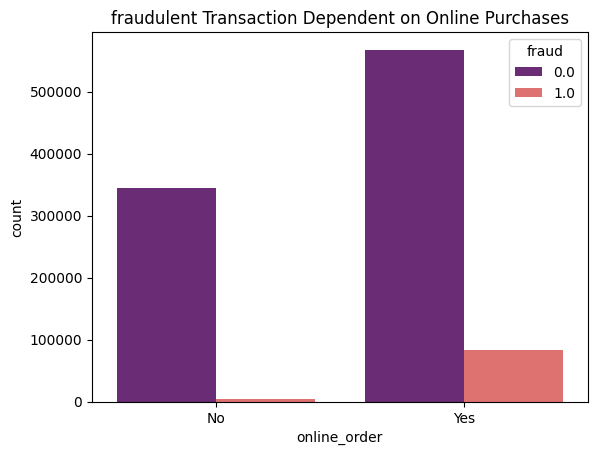

In [10]:
# check if for fraud occurrences in online purchases
sns.countplot(x = 'online_order',hue = 'fraud', data = card, palette = 'magma')
print(pd.crosstab(index = card['fraud'], columns = card['online_order']))
plt.title("fraudulent Transaction Dependent on Online Purchases")
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

As we can see there was definitely more fraud purchases done online compared to purchases not done online.

used_pin_number     0.0     1.0
fraud                          
0.0              812262  100335
1.0               87130     273


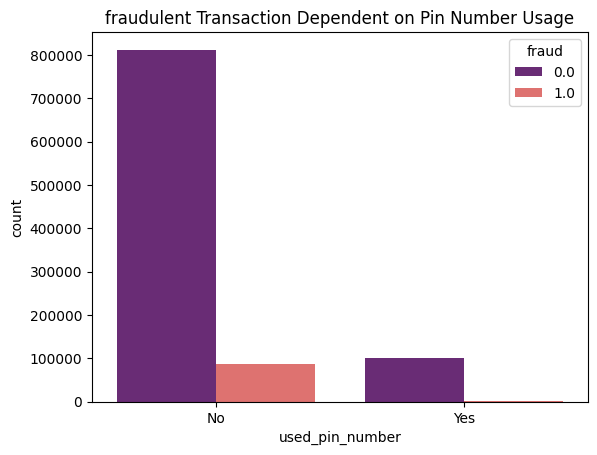

In [11]:
# check if for fraud occurrences if the card pin was used
sns.countplot(x = 'used_pin_number',hue = 'fraud', data = card, palette = 'magma')
print(pd.crosstab(index = card['fraud'], columns = card['used_pin_number']))
plt.title("fraudulent Transaction Dependent on Pin Number Usage")
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

Now comparing fraudulent purchase where the card pin was used we can see a majority of fraudulent purchases occured without using the card pin.

used_chip     0.0     1.0
fraud                    
0.0        584608  327989
1.0         64993   22410


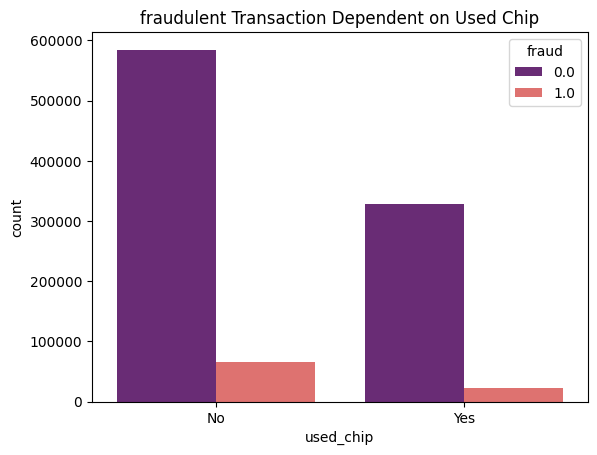

In [12]:
# check if for fraud occurrences if the card chip was used
sns.countplot(x = 'used_chip',hue = 'fraud', data = card, palette = 'magma')
plt.title("fraudulent Transaction Dependent on Used Chip")
print(pd.crosstab(index = card['fraud'], columns = card['used_chip']))
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

There was more fraudulent purchases where the chip on the card was not used. 

repeat_retailer     0.0     1.0
fraud                          
0.0              107986  804611
1.0               10478   76925


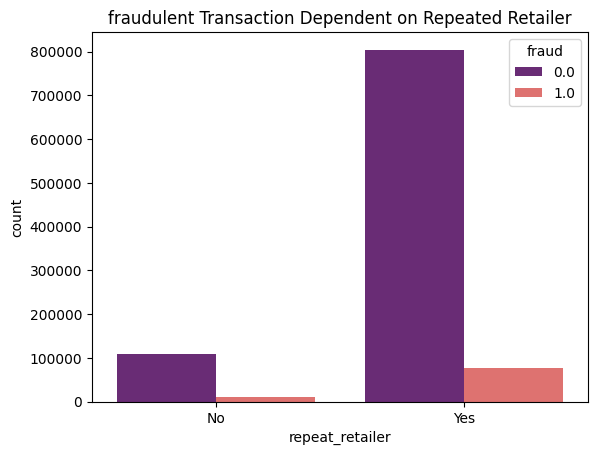

In [13]:
# check if for fraud occurrences if it was in a repeated retailer
sns.countplot(x = 'repeat_retailer',hue = 'fraud', data = card, palette = 'magma')
print(pd.crosstab(index = card['fraud'], columns = card['repeat_retailer']))
plt.title("fraudulent Transaction Dependent on Repeated Retailer")
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

This one was interesting to me since more fraudulent purchases occured where the card was used to purchase an item previously. The probability of a fraudulent purchase in a repeated retailer was greater than a purchase on a unknown location. I don't see this as a coincidence or perhaps the retailer is a common place where fraudster go and buy items. 

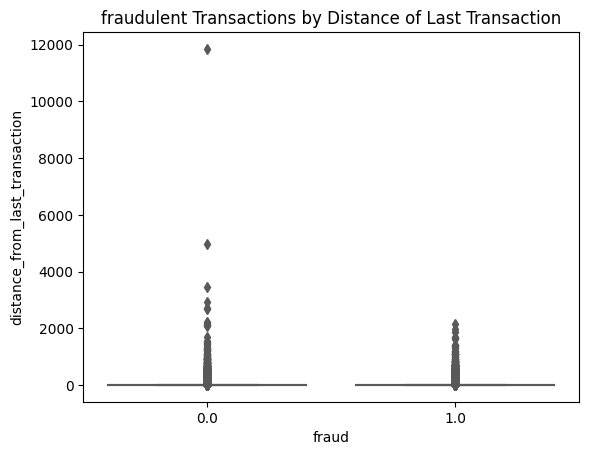

In [14]:
sns.boxplot(x = 'fraud', y = 'distance_from_last_transaction', 
                data = card, palette = 'Set2')
plt.title("fraudulent Transactions by Distance of Last Transaction")
plt.show()

This one was also interesting to me, where fraudulent purchases occured relatively close to the lastest transaction on the same card. 

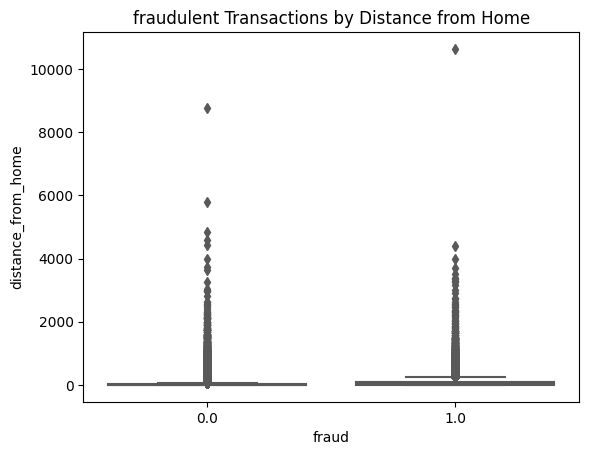

In [15]:
sns.boxplot(x = 'fraud', y = 'distance_from_home', 
                data = card, palette = 'Set2')
plt.title("fraudulent Transactions by Distance from Home")
plt.show()

## Preprocessing for Modeling

We have to be careful the way we split the data since we observed there were a huge difference between legitimate purchases and fraudulent purchases, there were way more legitimate purchases in our dataset. We want to split the data so that when we train the model so that it has a good amount of samples to learn normal purchases but also enough samples to test our model to check whether a observation was fraudulent. To solve this issue we will use a specific strategy called stratified sampling where instead of pulling a certain subset of the data we will pull a shuffled sampling from the data. Note: This does not solve the problem of class imbalance in our dataset, however, it provides a better method of splitting the data. 

In [16]:
# metrics we will use to find the best model
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,confusion_matrix, classification_report

In [17]:
# convert to integer data type since they are categorical variables
card[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']] = card[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']].astype('int')

### Split the Data

In [18]:
# split the data

# our predictor variables
X = card.drop(['fraud'], axis = 1)

# our target variable
y = card['fraud']  

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [20]:
# splitting our data into training and testing sets
# we startify our target variable 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify = y)

In [21]:
# training sets shape
X_train.shape, y_train.shape

((700000, 7), (700000,))

In [22]:
# testing sets shape
X_test.shape, y_test.shape

((300000, 7), (300000,))

In [23]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
661471,4.805367,1.379477,1.236960,1,0,0,0
75275,27.052054,1.766070,0.415689,1,0,0,0
386916,7.360691,0.164692,0.983346,1,0,0,1
854266,535.761269,15.150715,2.220614,1,1,1,1
2376,3.089058,0.065205,1.039158,1,0,1,1
...,...,...,...,...,...,...,...
806884,6.176133,9.156109,0.414412,1,0,0,0
62473,18.062687,1.129769,1.039432,1,1,0,0
661343,17.333841,0.074861,6.977444,1,1,0,1
467315,4.529391,45.922502,1.831249,1,1,0,1


In [24]:
y_train.value_counts()

fraud
0    638818
1     61182
Name: count, dtype: int64

In [25]:
y_test.value_counts()

fraud
0    273779
1     26221
Name: count, dtype: int64

## Modeling

### Random Forest Classifier

In [26]:
# import our random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
# instantiate our model
rfc = RandomForestClassifier(random_state = 0)
# train our model
rfc.fit(X_train, y_train)

# stratified shuffle 
skf = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)

# cross Validation scores
tr_sc = cross_val_score(rfc, X_train, y_train, cv = skf)
te_sc = cross_val_score(rfc, X_test, y_test, cv = skf)

print('Random Forest Classifier scores:')
print(f'Mean accuracy score of 5-fold CV on Training set: {tr_sc.mean()} (std: {tr_sc.std()})')
print(f'Mean accuracy score of 5-fold CV on Testing set: {te_sc.mean()} (std: {te_sc.std()})')

Random Forest Classifier scores:
Mean accuracy score of 5-fold CV on Training set: 0.9999857142857141 (std: 7.824607964335488e-06)
Mean accuracy score of 5-fold CV on Testing set: 0.9999733333333334 (std: 2.260776661041507e-05)


In [28]:
# create a feature importance data frame
dict1 = {'columns': rfc.feature_names_in_, 'importance': rfc.feature_importances_}
forest_importances = pd.DataFrame(dict1).sort_values('importance', ascending = False)
forest_importances

,columns,importance
2,ratio_to_median_purchase_price,0.510585
6,online_order,0.175434
0,distance_from_home,0.137584
5,used_pin_number,0.064779
4,used_chip,0.059978
1,distance_from_last_transaction,0.044310
3,repeat_retailer,0.007331


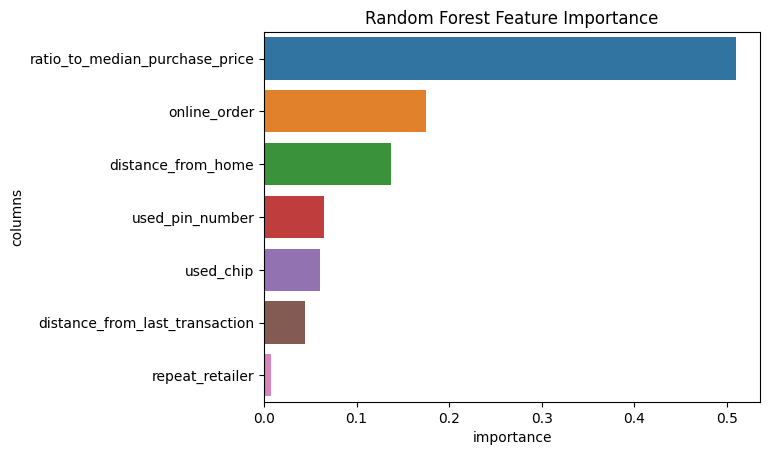

In [29]:
# plotting a horizontal bar chart on feature importance 
sns.barplot(data = forest_importances, y = 'columns', x = 'importance')
plt.title("Random Forest Feature Importance")
plt.show()

## XGBoost Classifier

In [30]:
# import our xgboost classifier
from xgboost import XGBClassifier

In [31]:
# instantiate our model
boost = XGBClassifier(random_state = 5)
# train our boosting model
boost.fit(X_train,y_train)

# our stratified shuffle
skf = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)
# 5-fold cross validation
tr_sc = cross_val_score(boost, X_train, y_train, cv = skf)
te_sc = cross_val_score(boost, X_test, y_test, cv = skf)

# accuracy mean score
print('XGBoost Classifier scores:')
print(f'Mean accuracy score of 5-fold CV on Training set: {tr_sc.mean()} (std: {tr_sc.std()})')
print(f'Mean accuracy score of 5-fold CV on Testing set: {te_sc.mean()} (std: {te_sc.std()})')

XGBoost Classifier scores:
Mean accuracy score of 5-fold CV on Training set: 0.9999757142857142 (std: 1.069044967647206e-05)
Mean accuracy score of 5-fold CV on Testing set: 0.9999566666666666 (std: 3.091206165164894e-05)


In [32]:
# create a feature importance data frame
dict1 = {'columns': boost.feature_names_in_, 'importance': boost.feature_importances_}
boost_importances = pd.DataFrame(dict1).sort_values('importance', ascending = False)
boost_importances

,columns,importance
2,ratio_to_median_purchase_price,0.536974
6,online_order,0.260885
5,used_pin_number,0.069966
4,used_chip,0.055687
0,distance_from_home,0.054601
1,distance_from_last_transaction,0.021888
3,repeat_retailer,0.000000


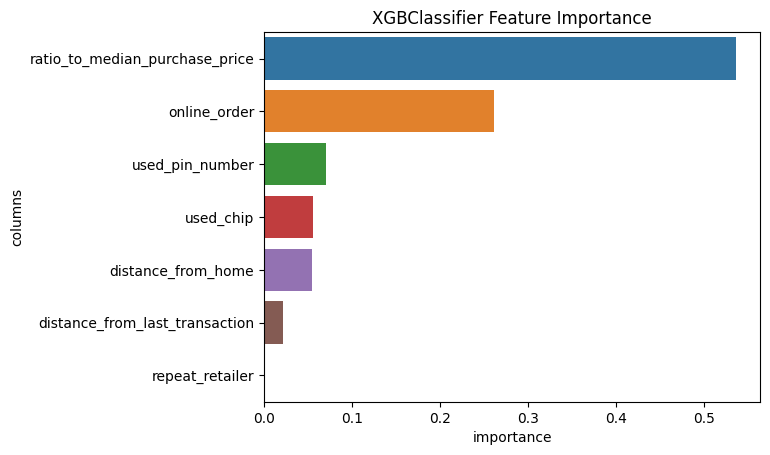

In [33]:
# plotting a horizontal bar chart on feature importance 
sns.barplot(data = boost_importances, y = 'columns', x = 'importance')
plt.title("XGBClassifier Feature Importance")
plt.show()

## Logistic Regression 

In [34]:
# import our logistic regression
from sklearn.linear_model import LogisticRegression

In [35]:
# Logistic Regression with Lasso penalty (L1)
log_l1 = LogisticRegression(solver = 'liblinear',penalty = 'l1')
log_l1.fit(X_train,y_train)

# stratified shuffle 
skf = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)
tr_sc = cross_val_score(log_l1, X_train, y_train, cv = skf)
te_sc = cross_val_score(log_l1, X_test, y_test, cv = skf)

# accuracy mean scores
print('Logistic Regression with L1 penalty, scores:')
print(f'Mean accuracy score of 5-fold CV on Training set: {tr_sc.mean()} (std: {tr_sc.std()})')
print(f'Mean accuracy score of 5-fold CV on Testing set: {te_sc.mean()} (std: {te_sc.std()})')

Logistic Regression with L1 penalty, scores:
Mean accuracy score of 5-fold CV on Training set: 0.9584185714285715 (std: 0.00024212494666165768)
Mean accuracy score of 5-fold CV on Testing set: 0.9595733333333334 (std: 0.00043736585244952714)


In [36]:
# Logistic Regression With Ridge penalty (L2)
log_l2 = LogisticRegression(solver = 'liblinear',penalty = 'l2')
log_l2.fit(X_train,y_train)

skf = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)
tr_sc = cross_val_score(log_l2, X_train, y_train, cv = skf)
te_sc = cross_val_score(log_l2, X_test, y_test, cv = skf)


print('Logistic Regression with L2 penalty, scores:')
print(f'Mean accuracy score of 5-fold CV on Training set: {tr_sc.mean()} (std: {tr_sc.std()})')
print(f'Mean accuracy score of 5-fold CV on Testing set: {te_sc.mean()} (std: {te_sc.std()})')

Logistic Regression with L2 penalty, scores:
Mean accuracy score of 5-fold CV on Training set: 0.9582785714285714 (std: 0.00020503857277725471)
Mean accuracy score of 5-fold CV on Testing set: 0.95922 (std: 0.00044825587930704194)


The accuracy of Logistic(L1) model on testing set is: 95.91866666666667% 



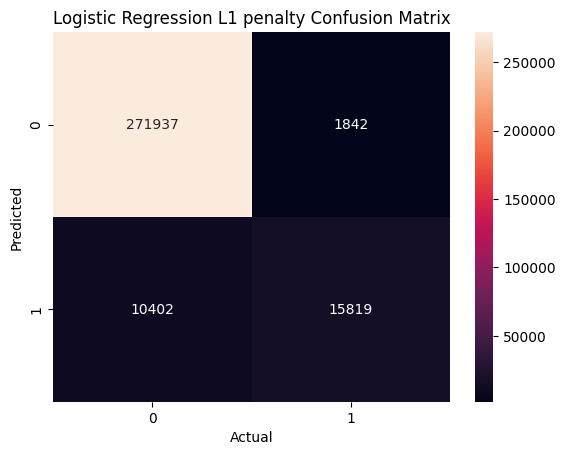

In [37]:
# L1 penalty performed slightly better will make a prediction with that model
y_pred = log_l1.predict(X_test)

# Confusion Matrix
log_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(log_matrix, annot=True, fmt="d")
plt.title('Logistic Regression L1 penalty Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')

print(f"The accuracy of Logistic(L1) model on testing set is: {accuracy_score(y_test, y_pred)*100}% \n")

In [38]:
# logistic regression with lasso penalty (L1) Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    273779
           1       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



Creating a confusion matrix on the testing set and using sklearn [confusion matrix documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) the upper left corner represents the true negatives. In our scenario the true negatives represents all non-fraudulent purchase predicted accurately by the Logistic Regression model. The lower right corner are the true positives or the fraudulent purchases predicted accurately by our model. However in the top right corner we have the false positives, which represents all the observations categorized as fraudulent purchases but actually weren't fraudulent purchases. The number of false positives in our model was about 1841 purchases that were considered fraudulent transactions but actually were not. Now this represents a problem since we are denying a good amount of purchases, since they were considered fraudulent but weren't, this mistake might cost a company a huge amount of money. So we want to reduce the amount of false positives and categorized them as verified purchases. Note we might classify actual fraudulent purchases as non-fraudulent purchases but this scenario would cost the company less expense rather than considering worst case scenario as a fraudulent purchase. 

In [39]:
log_l1.predict_proba(X_test)

array([[9.37994249e-01, 6.20057509e-02],
       [9.99988736e-01, 1.12638207e-05],
       [9.99740316e-01, 2.59683762e-04],
       ...,
       [9.99964233e-01, 3.57665568e-05],
       [9.88930950e-01, 1.10690505e-02],
       [1.95772219e-01, 8.04227781e-01]])

The accuracy of Logistic(L1) model on testing set is: 94.71133333333334% 



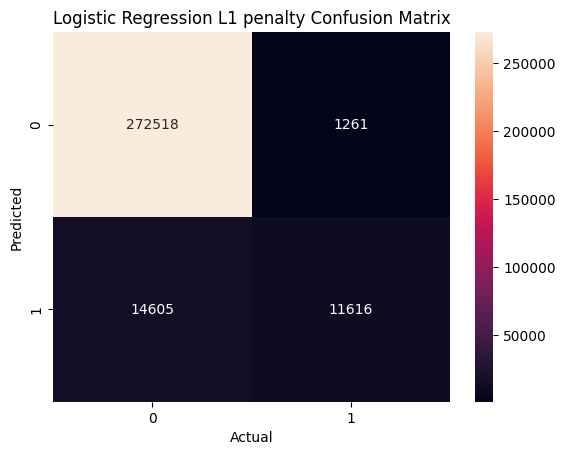

In [40]:
# will change the probability threshold for predicting a fraudulent transaction
THRESHOLD = .70
y_pred = np.where(log_l1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

# Confusion Matrix
log_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(log_matrix, annot=True, fmt="d")
plt.title('Logistic Regression L1 penalty Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')

print(f"The accuracy of Logistic(L1) model on testing set is: {accuracy_score(y_test, y_pred)*100}% \n")


Observe how increasing the threshold for a fraudulent purchase probability to be greater than 75%, we were able to reduce the number of false positives by 700. However, this came at a cost of reducing the number of true positive, the number of predicting a fraudulent purchase. We also increased the number of false negatives, the fraudulent purchases classified as non-fraudulent purchases. 

## Finding best Threshold

We have to consider we want to find the best model that has the highest prediction for fraudulent transactions while having a relatively low error on misclassified fraudulent transactions. In other words we want our true positives to be high and false positives to be low in our confusion matrix. The reason we want this is that it can cost the company a good amount of money to by misidentify a fraudulent transaction. 

In [41]:
# Define a function to find the best threshold for a given model
def find_best_threshold(model, num_steps):
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0
    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, num_steps):
        # Predict the target variable using the given threshold
        y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
        # Calculate various evaluation metrics
        f1 = f1_score(y_test, y_predict)
        acc = accuracy_score(y_test, y_predict)
        rec = recall_score(y_test, y_predict)
        pre = precision_score(y_test, y_predict)
        # Update the best threshold and metrics if F1 score improves
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = \
                threshold, f1, acc, rec, pre
    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [42]:
# first we define our models and objects into a list
model_names = ["Logistic Regression", "Random Forest", "XGBClassifier"]
models = [log_l1, rfc, boost]

In [43]:
# Create an empty list to store the results
chart = list()

# Iterate over the models and find the best threshold for each one
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 20)
    # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

# Create a pandas dataframe from the chart list and display it
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
#chart.to_csv('model_evaluation_scores.csv')
chart

c:\Users\luis_\Documents\Github - Main\Credit-Card-Fraud-Detection-\cardenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.315789,0.794844,0.965407,0.766714,0.825118
1,Random Forest,0.315789,0.999981,0.999997,0.999962,1.000000
2,XGBClassifier,0.105263,0.999886,0.999980,0.999886,0.999886


In [44]:
def make_confusion_matrix_val(model, threshold=0.5):
    """
    Create a confusion matrix plot for the given model and threshold. 
    
    Parameters:
    -----------
    model : sklearn classifier
        The classification model to evaluate.
    threshold : float, default=0.5
        Probability threshold for binary classification.
        
    Returns:
    --------
    None
    
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    
    # calculate the confusion matrix
    fraud_confusion = confusion_matrix(y_test, y_predict)
    
    # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
    
    # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    
    # rotate y-axis ticks
    plt.yticks(rotation = 0)
    
    # set plot title, x and y labels
    plt.title('Predicted vs. Actual', fontsize = 20, pad = 10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

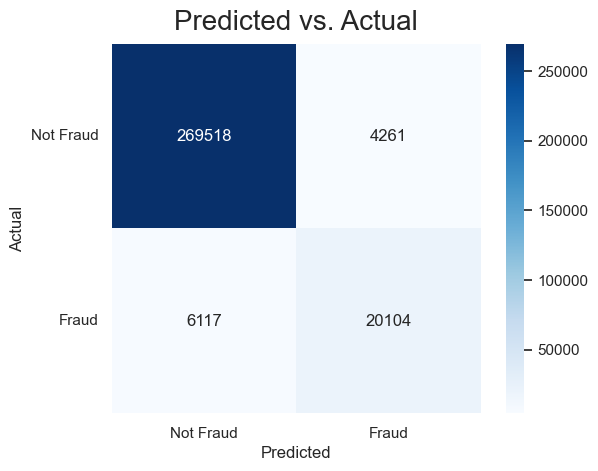

In [45]:
# Logistic regression confusion matrix with best threshold
make_confusion_matrix_val(log_l1, threshold=0.315789)

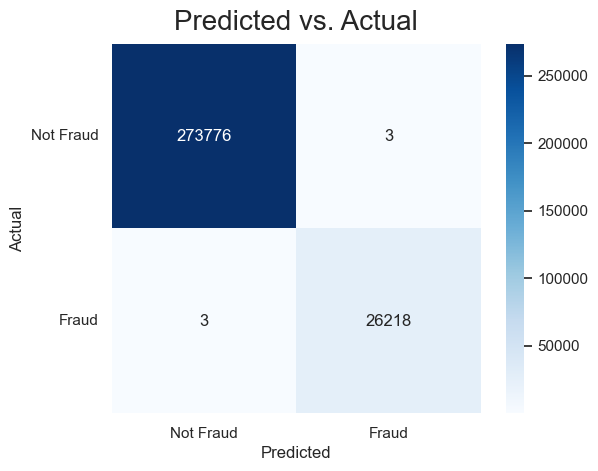

In [46]:
# XGBoost confusion matrix with best threshold
make_confusion_matrix_val(boost, threshold=0.105263)

# Credit Card Fraud Predictor System 

In [47]:
real_card.loc[real_card['fraud']==1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [48]:
# we choose a random observation
sample = real_card.sample(1)

In [49]:
# check if the example is a fraudulent purchase or not
sample.T

,246643
distance_from_home,47.020068
distance_from_last_transaction,0.138581
ratio_to_median_purchase_price,1.646250
repeat_retailer,1.000000
used_chip,0.000000
used_pin_number,1.000000
online_order,1.000000
fraud,0.000000


Lets see if our credit card fraud detector system is able to predict the status of this transaction.

In [50]:
# we drop the fraud column from our sample
example = sample.drop(['fraud'], axis = 1)

In [51]:
# check if fraud column from sample was dropped
example.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
246643,47.020068,0.138581,1.64625,1.0,0.0,1.0,1.0


In [52]:
def preprocess(data):
  # convert data type
  data[['repeat_retailer','used_chip','used_pin_number','online_order']] = data[['repeat_retailer','used_chip','used_pin_number','online_order']].astype('int')

  # scale some columns
  # data[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']] = scaler.transform(data[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']])
  
  return data

In [53]:
# credit card fraud detection system

def fraud_prediction(obs):
    obs = preprocess(obs)
    result = np.where((boost.predict_proba(obs)[:, 1] >= 0.105263),1,0)
    if (result == 1):
        return "This is a fraudulent purchase!"
    else: 
        return "This transaction is verified"

In [54]:
# check the results 
fraud_prediction(example)

'This transaction is verified'

## Deployment of Model using Gradio

In [55]:
# import shap library
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


SHAP (SHapley Additive exPlanations) is a method used for explaining the output of machine learning models. It provides a way to understand the contribution of individual features to the prediction made by the model. SHAP values are based on cooperative game theory and provide a fair way to allocate the "credit" of the model's prediction to each feature.

Here's a brief overview of how SHAP feature importance works:

1. Background Dataset: To calculate SHAP values, a background dataset is required. This dataset represents the "average" or "baseline" state of the features and is used as a reference point to measure the impact of individual features on predictions.

2. Model Prediction: For each instance in the dataset you want to explain, the model predicts an output (e.g., a probability score or a regression value).

3. SHAP Values Calculation: SHAP values are computed by running the model on all possible combinations of features (subsets) for each instance. The contribution of each feature to the prediction is determined by comparing the model's output when the feature is included or excluded.

4. Shapley Values: SHAP values are calculated using the concept of Shapley values from cooperative game theory. These values fairly distribute the model's prediction among the individual features.

5. Feature Importance: After calculating SHAP values for all instances, you can aggregate them to get feature importances. This can be done by averaging the absolute SHAP values for each feature across the entire dataset or by using other summary statistics.

6. Interpretation: Positive SHAP values indicate that the feature pushes the model's prediction higher, while negative values indicate the opposite. The magnitude of the SHAP value represents the strength of the feature's impact.

SHAP values provide a powerful and model-agnostic way to understand the influence of features on the model's predictions, making it easier to interpret and trust the model's decisions.

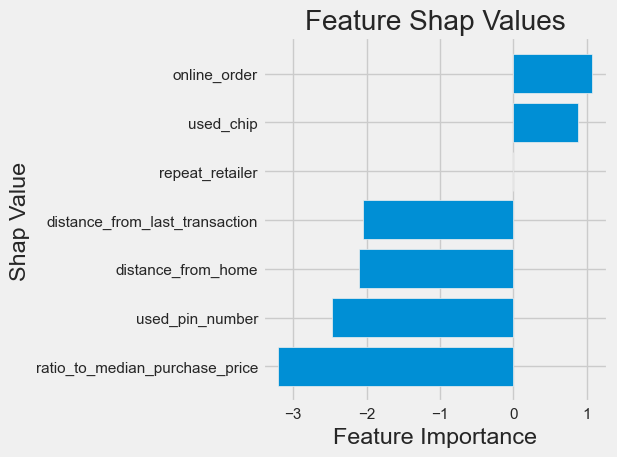

In [56]:
# shap values for an example observation
# this cell is to prepare a shap importance plot for our web app
plt.style.use("fivethirtyeight")

explainer = shap.TreeExplainer(boost)
shap_values = explainer.shap_values(example)
scores_desc = list(zip(shap_values[0], example.columns))
scores_desc = sorted(scores_desc)
fig_m = plt.figure(tight_layout=True)
plt.barh([s[1] for s in scores_desc], [s[0] for s in scores_desc])
plt.title("Feature Shap Values")
plt.ylabel("Shap Value")
plt.xlabel("Feature Importance")
plt.tight_layout()

In [87]:
def predict(*data):
      columns = ['distance_from_home', 'distance_from_last_transaction',
            'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
            'used_pin_number', 'online_order']
      df = pd.DataFrame([data], columns = columns)
      df = preprocess(df)
      prob_pred = boost.predict_proba(df)
      return {"Normal": float(prob_pred[0][0]), "Fraud": float(prob_pred[0][1])}

def interpret(*data):

      plt.style.use("fivethirtyeight")
      
      columns = ['distance_from_home', 'distance_from_last_transaction',
            'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
            'used_pin_number', 'online_order']
      df = pd.DataFrame([data], columns = columns)
      
      explainer = shap.TreeExplainer(boost)
      shap_values = explainer.shap_values(df)
      scores_desc = list(zip(shap_values[0], df.columns))
      scores_desc = sorted(scores_desc)
      fig_m = plt.figure(tight_layout=True)
      plt.barh([s[1] for s in scores_desc], [s[0] for s in scores_desc])
      plt.title("Feature Shap Values")
      plt.ylabel("Shap Value")
      plt.xlabel("Feature Importance")
      plt.tight_layout()
      return fig_m

## Conclusion: 
The XGBoost Classifier algorithm returned an accuracy score on both the training and testing data of above 99.99%. The accuracy score recieved was the mean of a 5-fold stratified cross validation on both data sets. Therefore, we can conclude that the model was not over fitting or being biased by the data it was trained on. This makes the credit card fraud detection system a pretty accurate detector for fraudulent transactions. 

In [88]:
# deployment module
import gradio as gr

In [95]:
with gr.Blocks() as demo:
    gr.HTML("""
    <h1 align="center">Credit Card Fraud Prediction System</h1>
    <p>This is a Web App that predicts Whether a Credit Card Transaction is Fraudulent or not. Just input the following parameters and click the predict button. If you want to see the influence that each parameter had on the outcome click the explain button</P>
    """)
    with gr.Row():
        with gr.Column():
            repeated_retailer = gr.Radio(["No","Yes"], type = "index", label = "Repeat Retailer", info ="Was the transaction at at a repeated store?")
            
            online_order = gr.Radio(["No","Yes"], type = "index", label = "Online Order", info ="Was the transaction an online order?")
            
            used_chip = gr.Radio(["No","Yes"], type = "index", label = "Used Chip", info ="did the purchase use the security chip of the card?")

            used_pin = gr.Radio(["No","Yes"], type = "index", label = "Used Pin Number", info ="Did the transaction use the pin code of the card?")
            
            distance_home = gr.Number(value = 25, label = "Distance From Home (miles)", info = "How far was the transaction from the card owner's house? (in Miles)")
            
            distance_last = gr.Number(value = 5, label = "Distance From Last Transaction (miles)", info = "How far away was the it from the last transaction that happened? (in Miles)")
            
            gr.HTML("""
                <h4 align="center">Ratio Median Purchase Price Equation</h4>
                    """)
            ratio_median = gr.Number(value = 1.8, label = "Ratio Median Purchase Price", info = "Divide the purchase price by card owners median purchase price?")
        
            
        with gr.Column():
            label = gr.Label()
            plot = gr.Plot()
            with gr.Row():
                predict_btn = gr.Button(value="Predict")
                interpret_btn = gr.Button(value="Explain")
            predict_btn.click(
                predict,
                inputs= [
                    distance_home,
                    distance_last,
                    ratio_median,
                    repeated_retailer,
                    used_chip,
                    used_pin,
                    online_order   
                ],
                outputs=[label],
            )
            interpret_btn.click(
                interpret,
                inputs=[
                    distance_home,
                    distance_last,
                    ratio_median,
                    repeated_retailer,
                    used_chip,
                    used_pin,
                    online_order   
                ],
                outputs=[plot],
            )

demo.launch()

Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


In [60]:
example.T

,246643
distance_from_home,47.020068
distance_from_last_transaction,0.138581
ratio_to_median_purchase_price,1.646250
repeat_retailer,1.000000
used_chip,0.000000
used_pin_number,1.000000
online_order,1.000000


In [61]:
real_card.loc[real_card.index == 13].T

,13
distance_from_home,2.131956
distance_from_last_transaction,56.372401
ratio_to_median_purchase_price,6.358667
repeat_retailer,1.000000
used_chip,0.000000
used_pin_number,0.000000
online_order,1.000000
fraud,1.000000


In [62]:
# # save our models
# import pickle

In [63]:
# model_name = "boost.sav"
# pickle.dump(boost,open(model_name,"wb"))